In [66]:
import pandas as pd
import category_encoders as ce
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
heart = pd.read_csv('./data/heart.csv', sep=',')

In [60]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Задание 8.1
1 point possible (graded)
Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [61]:
heart['old'] = heart['age'].apply(lambda age : 1 if age > 60 else 0)
heart['old'].sum()
# heart['slope'].value_counts()

79

Задание 8.2
1 point possible (graded)
Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

Возраст (лет)	Мужчины	Женщины
до 20	123/76	116/72
21-30	126/79	120/75
31-40	129/81	127/80
41-50	135/83	137/84
51-60	142/85	144/85
61 и старше	142/80	159/85
В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [62]:
def get_mean_trestbps(row):
  if row['age'] <= 20 :
    if row['sex'] == 1:
      return 123
    else:
      return 116
  if 21 <= row['age'] <= 30:
    if row['sex'] ==1:
      return 126
    else :
      return 120
  if 31 <= row['age'] <= 40:
    if row['sex'] ==1:
      return 129
    else :
      return 127
  if 41 <= row['age'] <= 50:
    if row['sex'] == 1 : 
      return 135
    else:
      return 137
  if 51 <= row['age'] <=60:
    if row['sex'] ==1:
      return 142
    else :
      return 144
  if row['age'] >=61:
    if row['sex']==1:
      return 142
    else :
      return 159
    
heart['trestbps_mean'] = heart.apply(get_mean_trestbps, axis=1)
heart.iloc[300]


age               68.0
sex                1.0
cp                 0.0
trestbps         144.0
chol             193.0
fbs                1.0
restecg            1.0
thalach          141.0
exang              0.0
oldpeak            3.4
slope              1.0
ca                 2.0
thal               3.0
target             0.0
old                1.0
trestbps_mean    142.0
Name: 300, dtype: float64

Задание 8.5
1 point possible (graded)
Закодируйте вышеперечисленные признаки методом OneHotEncoding, удалив исходные признаки.

Сколько признаков получилось в датасете?

In [63]:
col = ['cp','restecg','slope','ca','thal']
encoder = ce.OneHotEncoder(cols=col, use_cat_names=True)
type_bin = encoder.fit_transform(heart[col])
heart = pd.concat([heart, type_bin],axis=1)
heart  = heart.drop(columns=col)
heart

c:\Python310\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Python310\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Python310\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call r

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


In [64]:
heart.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.544554,0.260726,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# инициализируем нормализатор RobustScaler
r_scaller = preprocessing.RobustScaler()
cols_to_normalize = ['age', 'trestbps','chol','thalach','oldpeak']
heart[cols_to_normalize] = r_scaller.fit_transform(heart[cols_to_normalize])
heart.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.683168,0.081188,0.098646,0.148515,-0.103173,0.326733,0.149752,0.544554,0.260726,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,0.672748,0.466011,0.876907,0.816232,0.356198,0.704774,0.469794,0.725672,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,0.000000,-1.800000,-1.795276,0.000000,-2.523077,0.000000,-0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.555556,0.000000,-0.500000,-0.456693,0.000000,-0.600000,0.000000,-0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.444444,1.000000,0.500000,0.543307,0.000000,0.400000,1.000000,0.500000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.629630,1.000000,3.500000,5.102362,1.000000,1.507692,1.000000,3.375000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


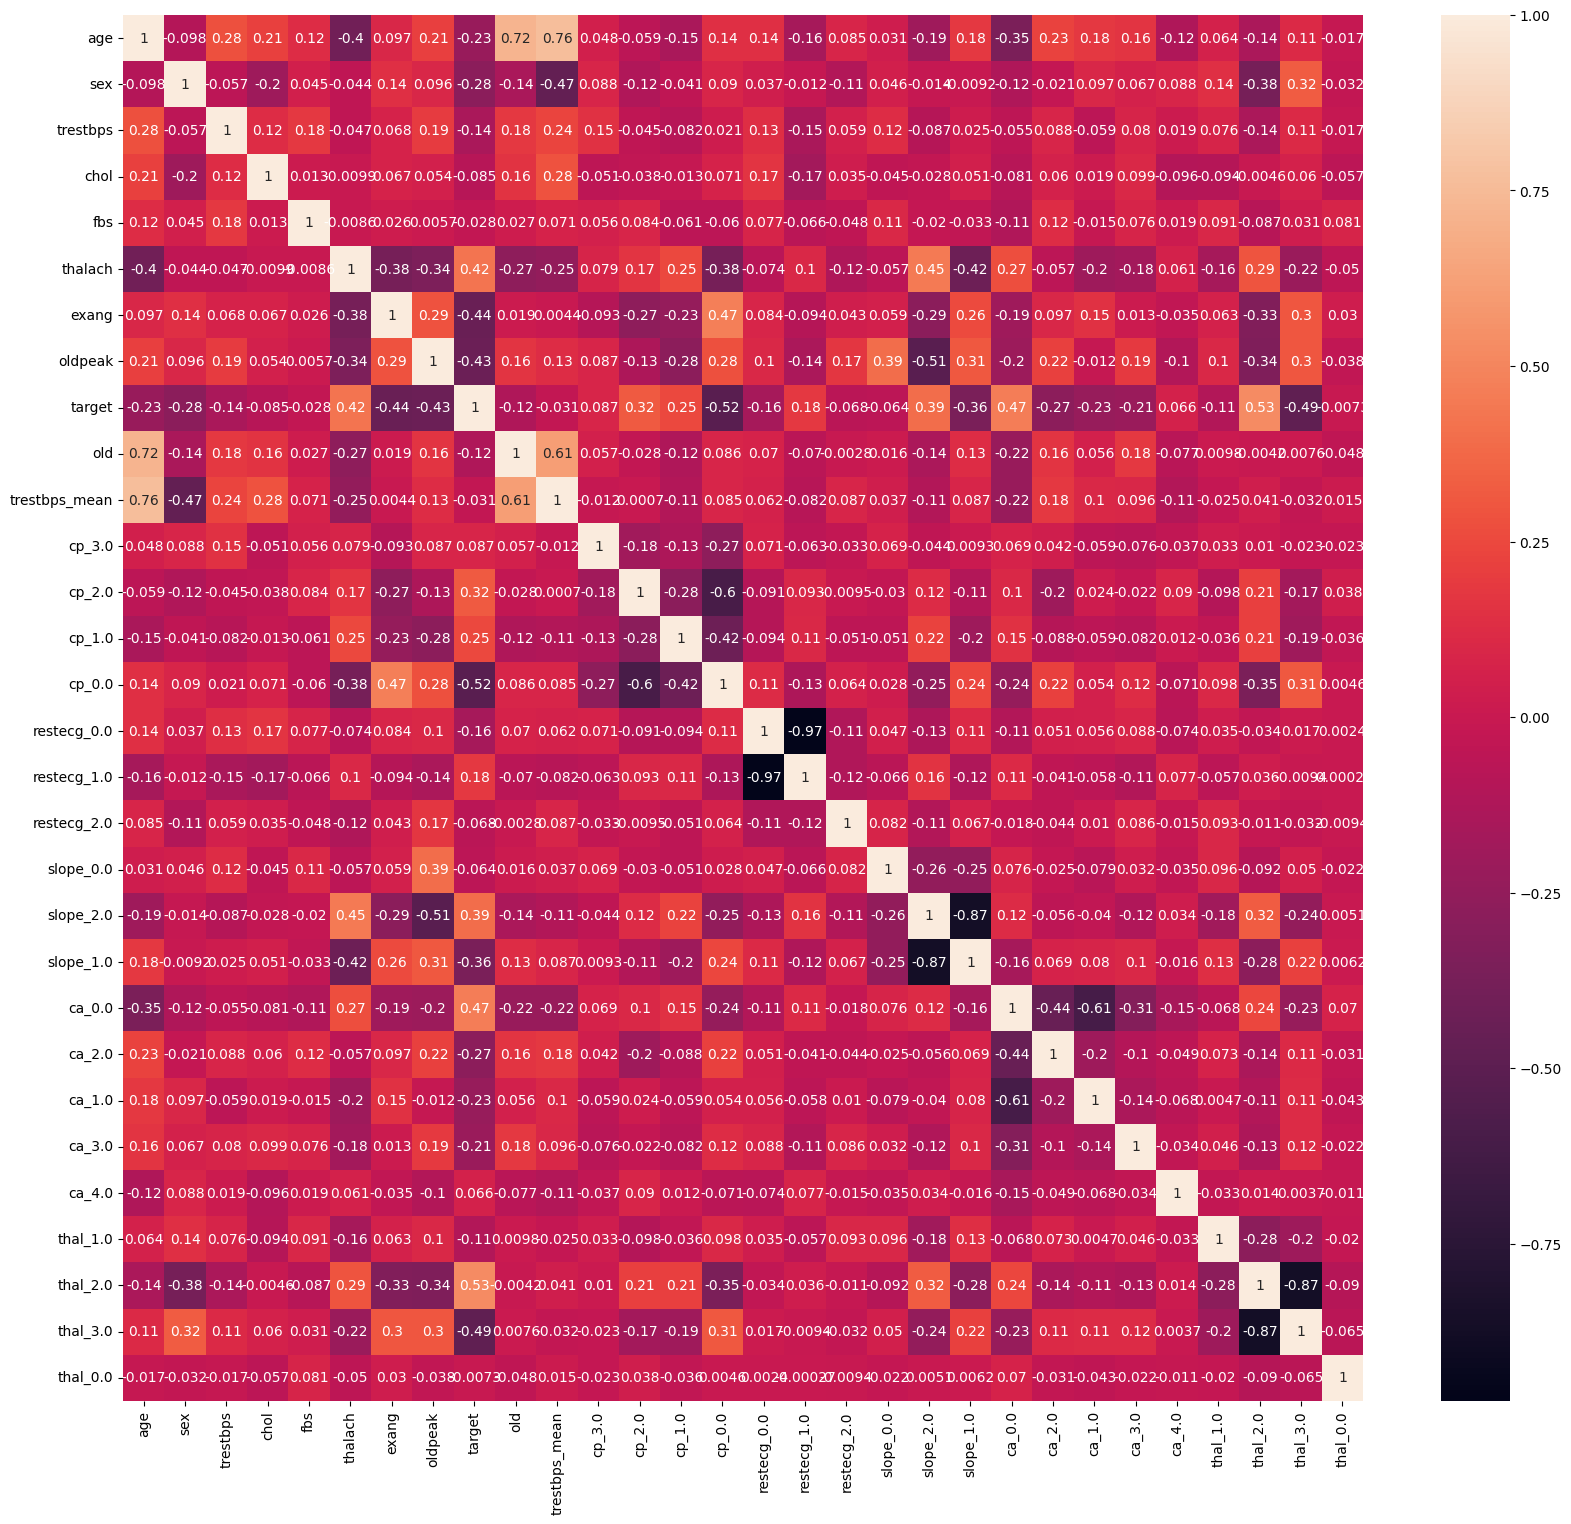

In [70]:
# Увеличиваем размер фигуры
plt.figure(figsize=(20, 18))
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(heart.corr(numeric_only=True), annot=True)
plt.show()